# Physics-Based Scene Simulation: Visualization of PD controlled body model

This notebook visualizes the balance dynamics of a two-legged standing body using an inverted pendulum model. 
It imports simulation data from `body_model_PD.py` and generates an animated visualization.


## Table of Contents
1. Approach
2. Equations of Motion
3. Notebook code for visualization


## 1. Approach 

Use PD controller to balance body figure by treating the torso as an inverted pendulum.

## 2. Equations of Motion:

The dynamics of the inverted pendulum (body model) controlled by a PD controller are described by the following equations:

$$
\tau = -K_p \theta - K_d \omega
$$

$$
\frac{d\omega}{dt} = \frac{-m g l \sin(\theta) - b \omega + \tau}{m l^2}
$$

$$
\frac{d\theta}{dt} = \omega
$$

**Where:**

- $\tau$ is the control torque applied.
- $\theta$ is the angle of the body (pendulum) with respect to vertical.
- $\omega$ is the angular velocity ($\frac{d\theta}{dt}$).
- $K_p, K_d$ are the proportional and derivative control gains.
- $m$ is the mass.
- $g$ is gravitational acceleration.
- $l$ is the length of the pendulum (leg).
- $b$ is the damping coefficient.

This equations are used in the 'body_model_PD.py' module to simulate the body.

## 3. Notebook code for visualization

In [1]:
# needed to see animation if using jupyter notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import os

# Import the simulation function from src directory
sys.path.append(os.path.abspath("../src/physics"))
#sys.path.append(r"C:\Users\Admin\Documents\Michigan MSU\Spring 2025\CMSE 802\Project\cmse802_project\src\physics")

from body_model_PD import simulate_balance


In [2]:
# Run the simulation and obtain data
time, theta_vals, x_torso_vals, y_torso_vals, x_arm_vals, y_arm_vals, x_head_vals, y_head_vals = simulate_balance()


<IPython.core.display.Javascript object>


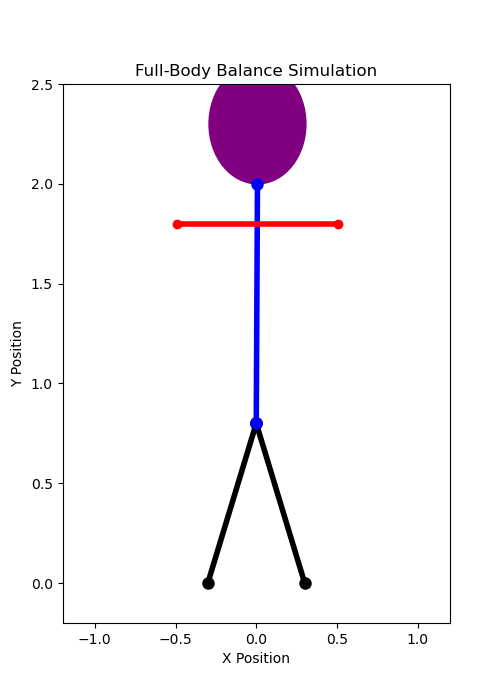

Frame | Head (x, y) | Arm (x1, y1) -> (x2, y2)
    0 | (0.37, 2.23) | (-0.13, 1.73) -> (0.87, 1.73)
    1 | (0.34, 2.24) | (-0.16, 1.74) -> (0.84, 1.74)
    2 | (0.30, 2.25) | (-0.20, 1.75) -> (0.80, 1.75)
    3 | (0.26, 2.27) | (-0.24, 1.77) -> (0.76, 1.77)
    4 | (0.21, 2.28) | (-0.29, 1.78) -> (0.71, 1.78)
    5 | (0.17, 2.29) | (-0.33, 1.79) -> (0.67, 1.79)
    6 | (0.13, 2.29) | (-0.37, 1.79) -> (0.63, 1.79)
    7 | (0.09, 2.30) | (-0.41, 1.80) -> (0.59, 1.80)
    8 | (0.05, 2.30) | (-0.45, 1.80) -> (0.55, 1.80)
    9 | (0.02, 2.30) | (-0.48, 1.80) -> (0.52, 1.80)


In [3]:
# Create animation of the full-body balance model
fig, ax = plt.subplots(figsize=(5, 7))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.2, 2.5)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Full-Body Balance Simulation")

# Initialize stick figure elements
leg1_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='black')  # Left leg
leg2_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='black')  # Right leg
torso_line, = ax.plot([], [], 'o-', lw=4, markersize=8, color='blue')  # Torso
arm_line, = ax.plot([], [], 'o-', lw=4, markersize=6, color='red')  # Arms
head_circle = plt.Circle((0, 0), 0.3, color='purple', fill=True)  # Head

# Add head to the plot
ax.add_patch(head_circle)

# Fixed foot positions
foot1_x, foot1_y = -0.3, 0
foot2_x, foot2_y = 0.3, 0

def init():
    leg1_line.set_data([], [])
    leg2_line.set_data([], [])
    torso_line.set_data([], [])
    arm_line.set_data([], [])
    head_circle.set_center((0, 0))
    return leg1_line, leg2_line, torso_line, arm_line, head_circle

def update(frame):
    # Legs: Fixed feet to torso
    x_leg1 = [foot1_x, (foot1_x + foot2_x) / 2]  # Midpoint represents the hip
    y_leg1 = [foot1_y, y_torso_vals[frame] - 1.2]  # Adjust for torso length

    x_leg2 = [foot2_x, (foot1_x + foot2_x) / 2]
    y_leg2 = [foot2_y, y_torso_vals[frame] - 1.2]

    # Torso
    x_torso = [(foot1_x + foot2_x) / 2, x_torso_vals[frame]]
    y_torso = [y_torso_vals[frame] - 1.2, y_torso_vals[frame]]

    # Arms
    x_arm = x_arm_vals[frame]
    y_arm = y_arm_vals[frame]

    # Head
    head_circle.set_center((x_head_vals[frame], y_head_vals[frame]))

    # Update lines
    leg1_line.set_data(x_leg1, y_leg1)
    leg2_line.set_data(x_leg2, y_leg2)
    torso_line.set_data(x_torso, y_torso)
    arm_line.set_data(x_arm, y_arm)

    return leg1_line, leg2_line, torso_line, arm_line, head_circle

# Print first 10 frames of arm and head positions
print("Frame | Head (x, y) | Arm (x1, y1) -> (x2, y2)")
for i in range(10):
    print(f"{i:5} | ({x_head_vals[i]:.2f}, {y_head_vals[i]:.2f}) | "
          f"({x_arm_vals[i][0]:.2f}, {y_arm_vals[i][0]:.2f}) -> "
          f"({x_arm_vals[i][1]:.2f}, {y_arm_vals[i][1]:.2f})")

    
# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=20)
ani.save("animation.mp4", writer="ffmpeg", fps=60)

plt.show()
